In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
fish = pd.read_csv("Fish.csv")

In [121]:
list01 = [1, 2, 3]
list02 = [4, 5, 6]
print(np.column_stack((list01, list02))) # 열로 붙여줌
one_list = np.ones(5)
zero_list = np.zeros(5)
print(np.concatenate((one_list, zero_list))) # 행으로 붙여줌

[[1 4]
 [2 5]
 [3 6]]
[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


In [122]:
# Species 열 중에 Bream or Smelt 값이면 True인 pandas.core.series.Series 반환
fish_length = fish[fish["Species"].isin(["Bream", "Smelt"])]["Length2"].tolist()
fish_weight = fish[fish["Species"].isin(["Bream", "Smelt"])]["Weight"].tolist()

In [123]:
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_data[:5])
print(fish_target)

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


Data split

In [124]:
# train_data, test_data,  train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42) # 2.5:1 -> 3.3 : 1 샘플링 편향 현상
train_data, test_data,  train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42) # stratify 파라미터 설정으로 해결

print(train_data.shape, test_data.shape)
print(train_target.shape, test_target.shape)
print(test_target)

(36, 2) (13, 2)
(36,) (13,)
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [125]:
kn = KNeighborsClassifier()
kn.fit(train_data, train_target) # 지도 학습

KNeighborsClassifier()

In [126]:
kn.score(test_data, test_target) # test 100점

1.0

###수상한 도미

In [127]:
test_cases = [[[25, 150]]] # 도미 데이터
for t in test_cases:
  print(kn.predict(t)) # 결과는 빙어로 판단.

[0.]


***산점도로 확인***   
도미와 가까운데 빙어로 판단

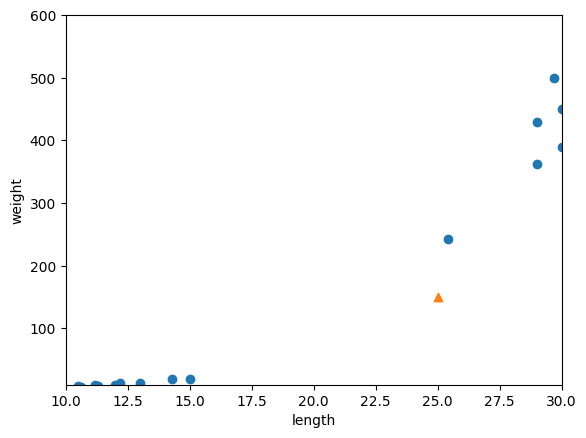

In [128]:
plt.scatter(train_data[:, 0], (train_data[:, 1]))
plt.scatter(25, 150, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.axis([10 ,30, 10, 600])
plt.show()

kneighbors() 메서드를 사용하여 근접 데이터 확인

In [129]:
distance, indexes = kn.kneighbors([[25, 150]])
print(distance)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


In [130]:
print(train_data[indexes])
print(train_target[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]


**최근접 이웃 데이터 표시**   


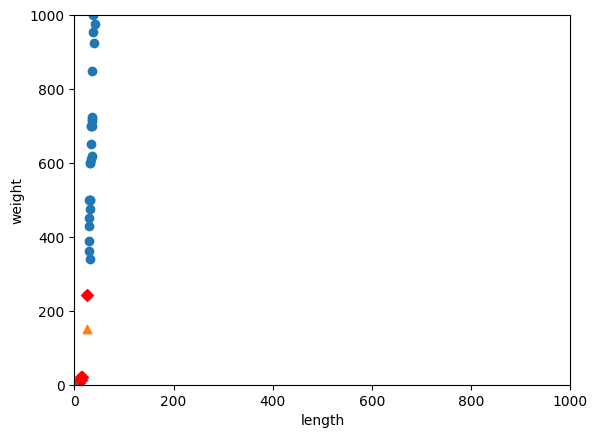

In [131]:
plt.scatter(train_data[:, 0], (train_data[:, 1]))
plt.scatter(25, 150, marker="^")
plt.scatter(train_data[indexes, 0], train_data[indexes, 1], color = 'r', marker = 'D')
plt.xlabel("length")
plt.ylabel("weight")
plt.axis([0 ,1000, 0, 1000])
plt.show()

데이터 전처리   
* 데이터 기준을 맞춰주는 작업
* 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측못함
* 이전 작업에서는 도미와 빙어 무게 스케일이 달라 올바른 결과를 못냄 (거리 기반 알고리즘은 더 민감)

In [132]:
mean = np.mean(train_data, axis = 0)
std = np.std(train_data, axis = 0)
print(mean)
print(std)
# 길이 평균,     무게 평균
# 길이 표준편차, 무게 표준편차

train_scaled = (train_data - mean) / std

[ 27.29722222 454.09722222]
[  9.98244253 323.29893931]


전처리 후 산점도 그래프

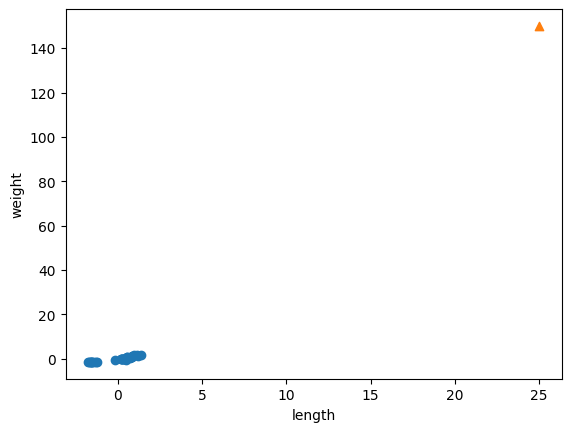

In [133]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

예측하고싶은 데이터도 전처리 해야됨

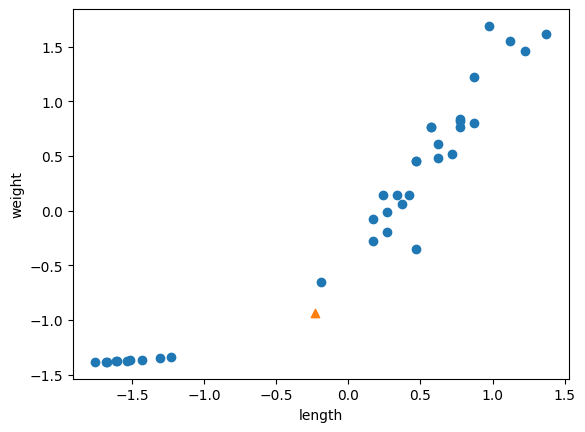

In [138]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 전처리 후 학습

In [136]:
kn.fit(train_scaled, train_target)
test_scaled = (test_data - mean) / std
kn.score(test_scaled, test_target)

1.0

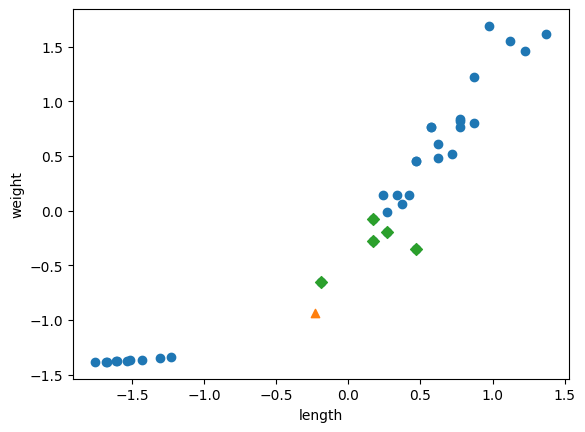

In [139]:
distance, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()